In [2]:
# Load segmentation mask
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import h5py
import torch
print(os.getpid())
plt.style.use('dark_background')


4182919


In [3]:
# ChromAn ris_availabled imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive
from ChromAn.src.spot_tools.spot_class import Spots3D

In [5]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231010-4T1v21x-50k0920_fixation_test/Glyoxal/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231010-4T1v21x-50k0920_fixation_test/Glyoxal/
-- 1 folders, 82 fovs detected.


In [6]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage_fixation.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20231010-4T1v21x-50k0920_fixation_test/Glyoxal/Analysis/color_usage_fixation.csv


In [7]:
from ChromAn.src.spot_tools.partition_spots import Spots_Partition
# match spots:
from scipy.spatial.distance import cdist

In [8]:
from ChromAn.src.spot_tools.match_spots import colocalize_spots

In [9]:
fov_2_info = {}
for _fov_id, _fov_name in enumerate(fovs):
    if _fov_id in fov_2_info:
        continue
    _fov_filename = os.path.join(folders[0], fovs[_fov_id])
    _save_filename = _fov_filename.replace('.dax', '.hdf5')
    
    # load spots, dapi_im and segmentation mask:
    try:
        with h5py.File(_save_filename, 'r') as _f:
            _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
            _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
            #_im_748 = _f['H0M1/748/im'][:]
            #_im_637 = _f['H0M1/637/im'][:]
            #_dapi_im = _f['H0M1/405/im'][:]
            _dna_mask = _f['dapi_mask'][:]
    except:
        continue
    #kept_spots_748, kept_spots_637 = colocalize_spots(_spots_748, _spots_637, threshold=300)

    # Search for segmentation label
    _label_748 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_748, #kept_spots_748, 
        search_radius=5, 
        verbose=True,
    )

    # Search for segmentation label
    _label_637 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_637, #kept_spots_637, 
        search_radius=5, 
        verbose=True,
    )
    #num_positive = len(np.unique(_label_748)[np.unique(_label_748) >= 0])
    #num_positive = len(np.unique(_label_637)[np.unique(_label_637) >= 0])
    
    union = np.union1d(np.unique(_label_748)[np.unique(_label_748) >= 0], np.unique(_label_637)[np.unique(_label_637) >= 0])
    print(union)
    num_positive = len(union)
    num_total = np.max(_dna_mask)
    # append
    fov_2_info[_fov_id] = {
        'num_positive': num_positive,
        'num_total': num_total,
    }
    print(_fov_id, num_positive, num_total)
    

-- partition barcodes for 110 spots
-- partition barcodes for 105 spots
[  3   7  10  12  14  16  17  20  25  26  27  30  31  32  33  34  35  37
  38  40  41  42  44  45  47  50  51  52  58  67  72  73  74  76  82  83
  85  87  88  90  91  92  93  96 101 103 104 105 106 107 108 116 117 118]
0 54 128
-- partition barcodes for 143 spots
-- partition barcodes for 150 spots
[ 1  2  3  7  8  9 10 11 12 13 14 17 18 19 20 21 22 23 24 25 26 28 29 30
 32 33 37 40 41 42 43 44 45 47 49 54 56 61 70 71 76 77 78 85 92 93]
1 46 95
-- partition barcodes for 82 spots
-- partition barcodes for 85 spots
[ 1  2  3  6  8 10 13 14 16 17 19 20 21 22 24 25 26 27 28 30 31 32 33 34
 38 43 45 46 47 49 50 51 52 53 54 55 56 58 59 61 62 64 65 66 67 69 70 71
 74 75 76 77 78 80 81 83 84]
2 57 88
-- partition barcodes for 118 spots
-- partition barcodes for 119 spots
[  2   4   5   7   8   9  10  11  13  14  16  17  19  20  22  23  24  25
  26  27  28  30  33  34  35  36  39  40  43  44  45  46  47  48  49  51
  52  5

-- partition barcodes for 49 spots
-- partition barcodes for 63 spots
[ 2  3  4  8  9 10 11 14 15 16 17 20 21 23 24 25 27 28 29 30 31 32 33 35
 36 38 39 40 42 43 44 45 46 47 48 49 50 52 54 55 56 57 59 63]
28 44 65
-- partition barcodes for 65 spots
-- partition barcodes for 60 spots
[ 1  3  4  6  7  8 10 11 14 15 17 18 20 22 23 25 26 27 28 29 31 33 34 35
 36 37 38 40 42 45 47 48 49 50 51 52 55 57 58 62 63 64 65 66 70 74 77 84
 91]
29 49 98
-- partition barcodes for 59 spots
-- partition barcodes for 99 spots
[ 9 10 24 26 29 30 31 32 33 43 50 53 56 58 60 62 63 64 66 67 69 70 71 73
 86 90]
30 26 92
-- partition barcodes for 19 spots
-- partition barcodes for 34 spots
[ 3  5  8  9 11 12 15 16 17 19 27 28 29 30 31 34 36 39 42 43 44 55 64 69
 71 77]
31 26 88
-- partition barcodes for 92 spots
-- partition barcodes for 99 spots
[  1   3   4   6   7   8  11  12  13  14  15  18  19  20  22  23  24  26
  27  29  30  31  32  34  35  36  37  38  40  41  42  43  44  45  46  47
  48  52  53  54  55

-- partition barcodes for 96 spots
-- partition barcodes for 118 spots
[  1   2   5   6   7   8   9  10  12  13  14  15  17  18  19  20  21  22
  23  27  28  30  31  33  34  35  36  37  39  40  44  47  49  53  54  55
  56  57  58  59  60  61  62  63  64  66  69  70  72  74  75  76  77  78
  79  80  81  82  84  90  91  93  99 100 102 103 111 117 118 120]
57 70 120
-- partition barcodes for 49 spots
-- partition barcodes for 60 spots
[ 1  3  4  8  9 10 14 19 20 21 25 29 30 32 34 37 38 39 40 43 44 46 48 50
 51 52 53 54 55 56 57 58 62 64 65 66 71 74 75 80 93]
58 41 100
-- partition barcodes for 36 spots
-- partition barcodes for 58 spots
[ 1  2  3  4  5  7  9 11 13 14 21 25 26 27 29 31 32 35 36 37 39 40 43 44
 45 46 47 48 49 52 53 54 56 57 58 63 65 66 67 68 69 71 73 77]
59 44 78
-- partition barcodes for 92 spots
-- partition barcodes for 102 spots
[  1   2   3   4   5   6   8  14  15  16  17  18  19  20  21  22  23  24
  25  27  28  29  31  32  33  34  35  38  40  45  47  50  51  55  58  

In [10]:
# calculate total ratio
total_positive, total_total = 0, 0
for _fov, _info in fov_2_info.items():
    num_positive, num_total = _info['num_positive'], _info['num_total']
    if num_total == 0 or num_positive <= 10:
        continue
    total_positive += num_positive
    total_total += num_total
#total_positive = np.sum([_v['num_positive'] for _k, _v in fov_2_info.items()])
#total_total = np.sum([_v['num_total'] for _k, _v in fov_2_info.items()])
print(f"Detection ratio for {os.path.basename(data_folder)}: {total_positive / total_total}")

Detection ratio for : 0.552349930200093


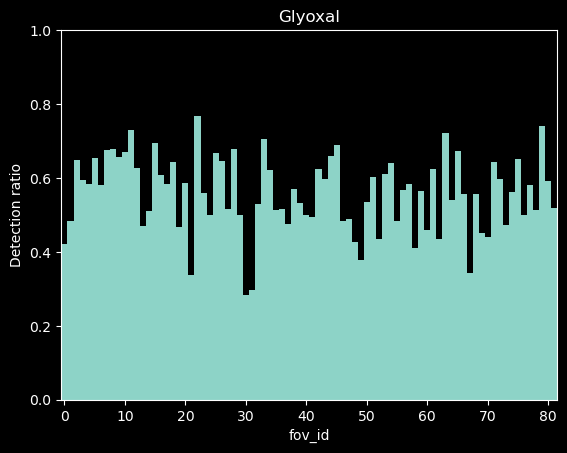

In [11]:
%matplotlib inline
fov_detection_df = pd.DataFrame.from_dict(fov_2_info, orient='index')
fov_detection_df['fov_id'] = fov_2_info.keys()
fov_detection_df['ratio'] = fov_detection_df['num_positive'] / fov_detection_df['num_total']
fov_detection_df = fov_detection_df.set_index('fov_id')

kept_fov_ratios = fov_detection_df['ratio']
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/')))
plt.show()

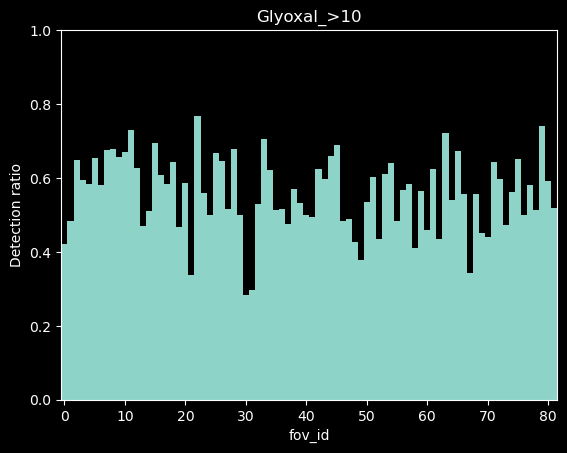

In [12]:
kept_fov_ratios = fov_detection_df['ratio'][fov_detection_df['num_total'] > 10]
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/'))+'_>10')
plt.show()

In [16]:

_fov_filename = os.path.join(folders[0], fovs[30])
_save_filename = _fov_filename.replace('.dax', '.hdf5')

with h5py.File(_save_filename, 'r') as _f:
    _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
    _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
    _im_748 = _f['H0M1/748/im'][:]
    _im_637 = _f['H0M1/637/im'][:]
    _dapi_im = _f['H0M1/405/im'][:]
    _dna_mask = _f['dapi_mask'][:]

<IPython.core.display.Javascript object>


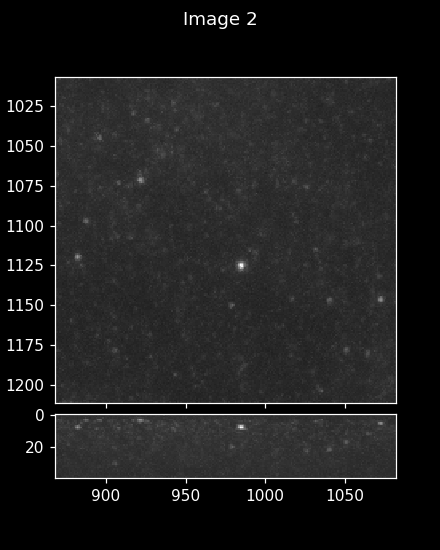

In [17]:
%matplotlib notebook
interactive.imshow_mark_3d([_im_748, _im_637, _dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


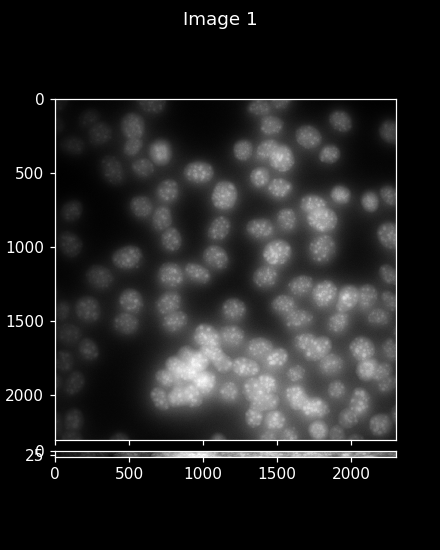

In [18]:
%matplotlib notebook
interactive.imshow_mark_3d([_dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


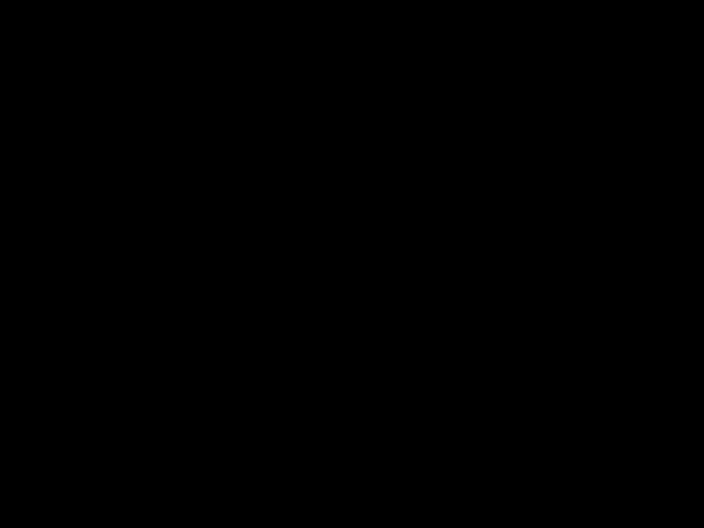

NameError: name 'kept_spots_637' is not defined

In [15]:
plt.figure()
plt.scatter(kept_spots_637.to_coords()[:,1], kept_spots_637.to_coords()[:,2])